## Model 1: Logistic Regression

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

save_figures = False
figure_path = "../figures/preprocessing/"
# df_init = pd.read_parquet("../data/init.parquet")
# df_before = pd.read_parquet("../data/before_split.parquet")
df_train = pd.read_parquet("../data/prep_train.parquet")
# df_val = pd.read_parquet("../data/prep_val.parquet")
# df_test = pd.read_parquet("../data/prep_test.parquet")

### asdf

In [3]:
df_train.head()

,x0_Year2015,x0_Year2016,x1_England,x1_Wales,x2_Asda,x2_Tesco Extra,x2_Tesco Metro,x2_Waitrose,x3_Evening,x3_Morning,...,x12_Year2016EnglandAge_g2,x12_Year2016EnglandAge_g3,x12_Year2016WalesAge_g1,x12_Year2016WalesAge_g2,x12_Year2016WalesAge_g3,x12_nan,ObsSize,FemaleN,MaleN,y
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.474725,0.584369,-1.000185,1
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.790563,0.584369,0.865711,1
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.474725,-1.162936,0.865711,1
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.474725,0.584369,-1.000185,1
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.474725,0.584369,-1.000185,0


In [4]:
X = df_train.iloc[:,0:-1].copy()
y = df_train["y"].copy()

X_cols = X.columns
X = X.to_numpy()

y = y.to_numpy()

In [16]:
from sklearn.linear_model import LogisticRegression

In [54]:
LR = LogisticRegression(penalty = 'none', fit_intercept = False, max_iter = 1000)

In [55]:
LR.fit(X, y)

LogisticRegression(fit_intercept=False, max_iter=1000, penalty='none')

In [56]:
y_prob = LR.predict_proba(X)[:,1]

In [57]:
y, y_prob

(array([1, 1, 1, ..., 1, 0, 1]),
 array([0.95774479, 0.95833231, 0.87065662, ..., 0.9438131 , 0.79861754,
        0.80930394]))

In [58]:
np.sum(y_prob > 0.5)

2720

In [59]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [60]:
fpr_lr, tpr_lr, p_crits_lr = roc_curve(y,y_prob) 
auc_lr = auc(fpr_lr, tpr_lr)


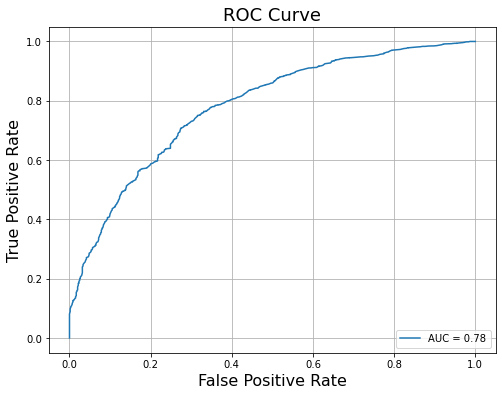

In [61]:
fig_lr, ax_lr = plt.subplots()

display = RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr, roc_auc=auc_lr)

display.plot(ax = ax_lr)

fig_lr.set_size_inches([8, 6])

ax_lr.set_xlabel(ax_lr.get_xlabel(), fontsize = 16)
ax_lr.set_ylabel(ax_lr.get_ylabel(), fontsize = 16)
ax_lr.set_title("ROC Curve", fontsize = 18)

ax_lr.grid()
